In [1]:
import pandas as pd

import sys
sys.path.append('../_styling/')
from style import prep_plot, BLACK, GRAY1, GRAY2

In [2]:
df = pd.read_csv("oss_funding.csv")
df['Color'] = GRAY2
df.loc[6, 'Color'] = GRAY1
df

,Source,Amount,Color
0,Ethereum Foundation,22000000,#ADADAD
1,GitHub Sponsors,33000000,#ADADAD
2,Open Collective,58675491,#ADADAD
3,Gitcoin Grants,60000000,#ADADAD
4,Optimism RetroPGF,121000000,#ADADAD
5,Linux Foundation,913000000,#ADADAD
6,Venture Capital,1357000000000,#5C5C5C


<Figure size 3740x1496 with 0 Axes>

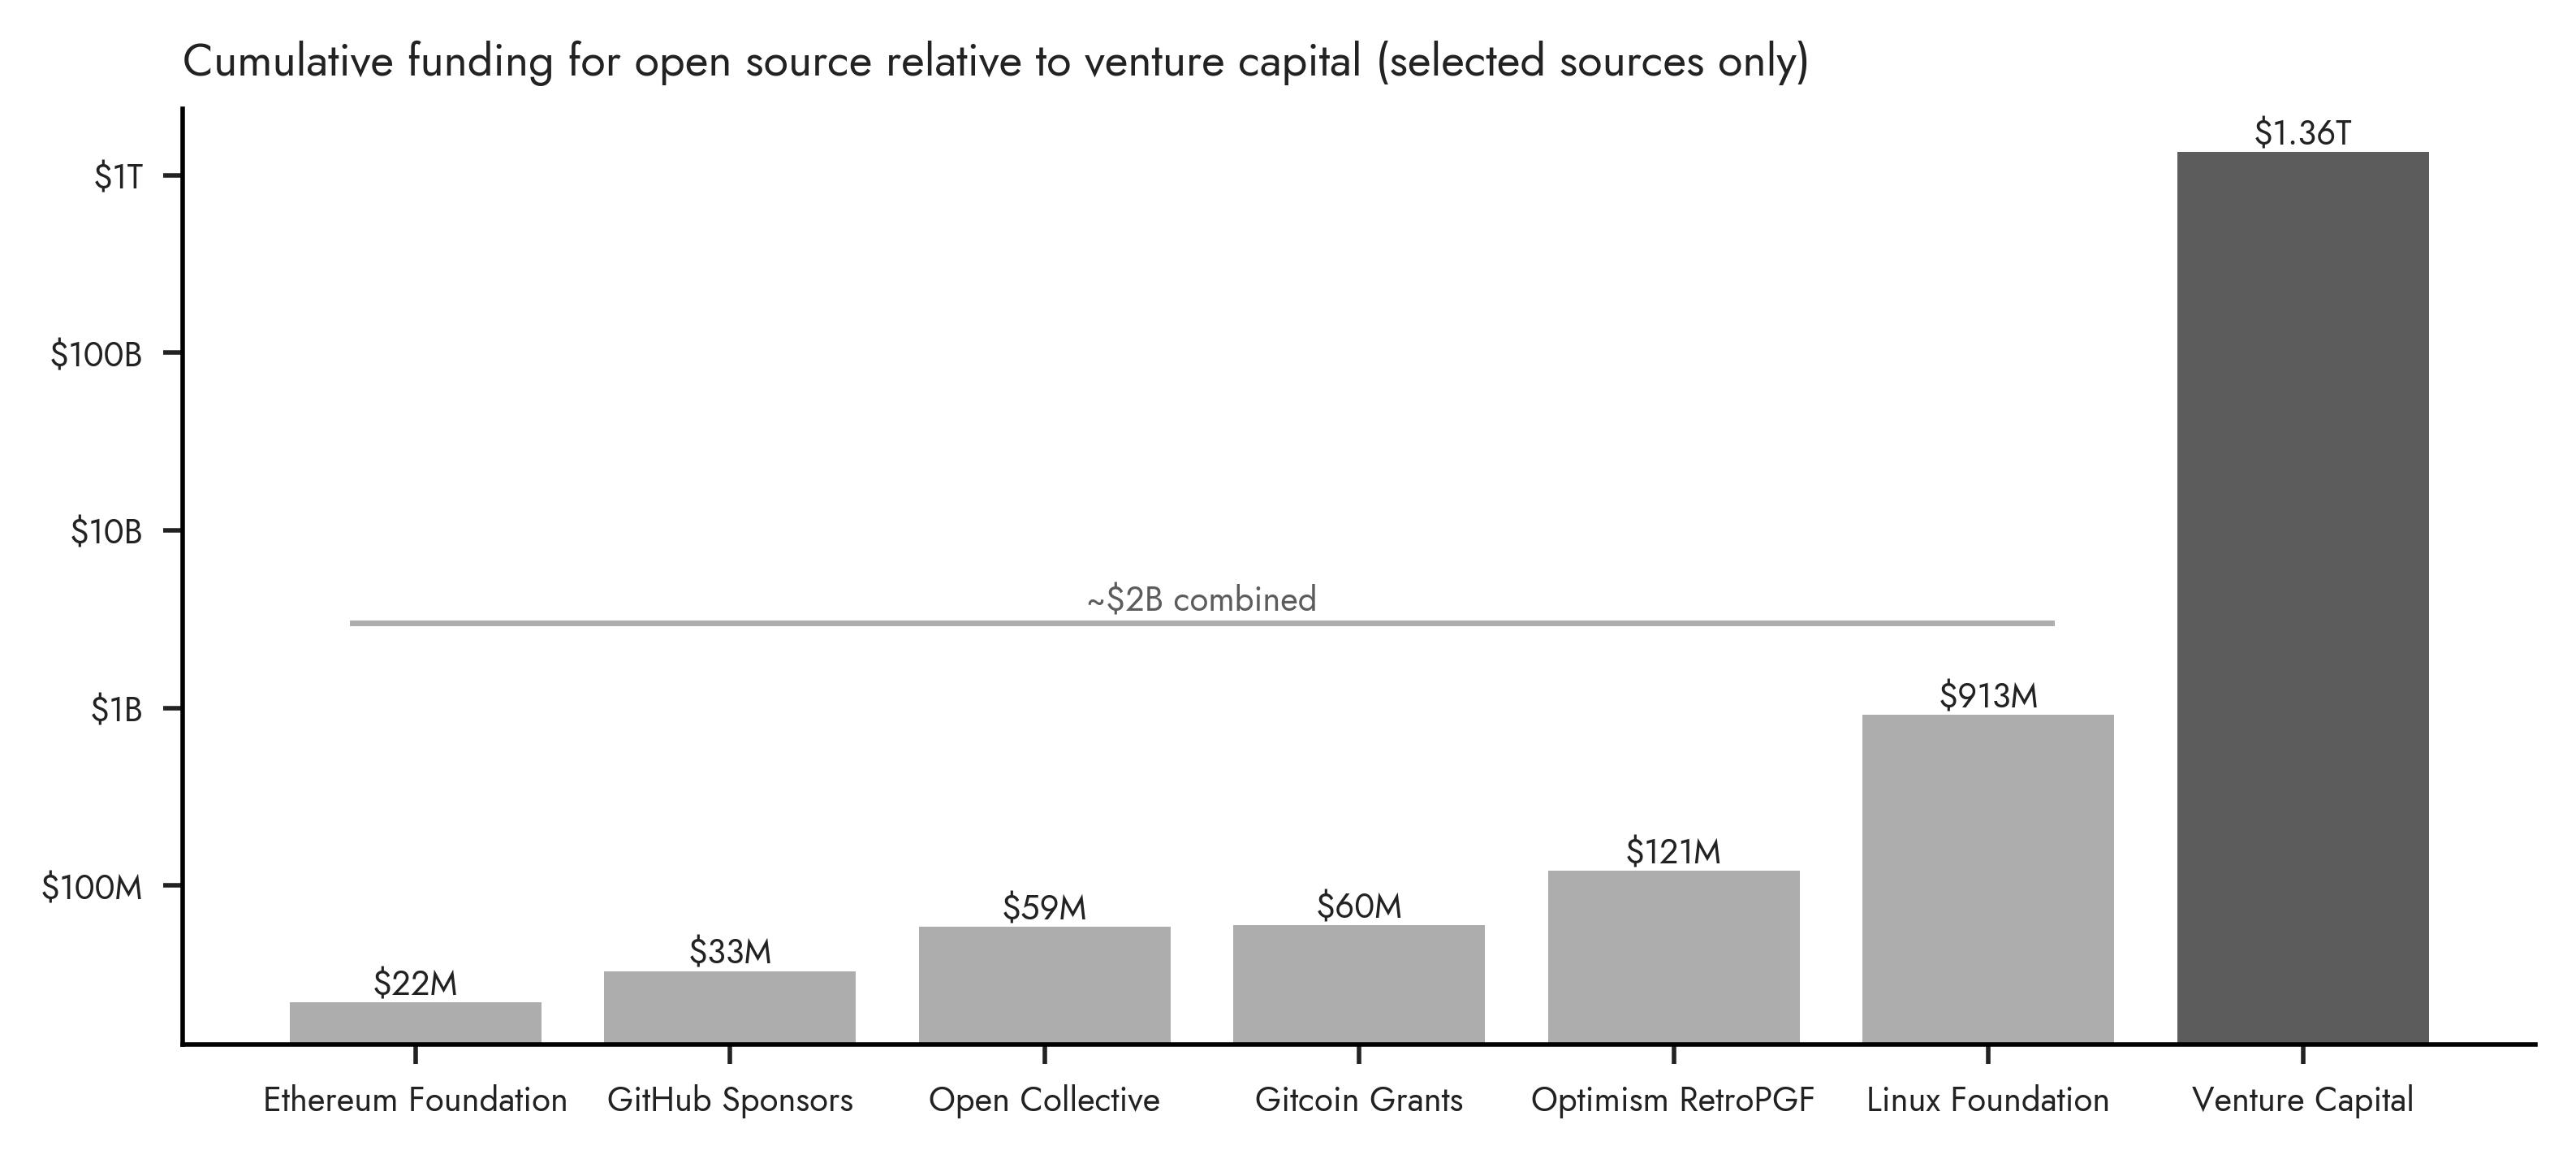

In [3]:
plt = prep_plot()

fig, ax = plt.subplots()
fontsize=6

ax.bar(df['Source'], df['Amount'], color=df['Color'])
ax.set_yscale('log')
ax.set_yticks(
    [1_000_000, 10_000_000, 100_000_000, 1_000_000_000, 10_000_000_000, 100_000_000_000, 1_000_000_000_000],
    labels=["", "$10M", "$100M", "$1B", "$10B", "$100B", "$1T"],
    fontsize=fontsize
)
ax.minorticks_off()
plt.xticks(rotation=0, fontsize=fontsize)

for x, row in df.iterrows():
    val = row['Amount'] / 1_000_000
    if val > 1000:
        val /= 1_000_000
        label = f"${val:.2f}T"
    else:
        label = f"${val:.0f}M"
    ax.text(s=label, x=x, y=row['Amount'], va='bottom', ha='center', fontsize=fontsize)

plt.plot([-0.2, 5.2], [3_000_000_000, 3_000_000_000], '-', lw=1, color=GRAY2)
ax.text(s="~$2B combined", x=2.5, y=3_200_000_000, va='bottom', ha='center', fontsize=fontsize, color=GRAY1)

ax.set_title("Cumulative funding for open source relative to venture capital (selected sources only)", loc='left', fontsize=fontsize+2)
plt.savefig("oss_funding.png", bbox_inches="tight")